In [29]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

AgentState below is a shared data structure between all nodes that keep track of information as the application runs

In [30]:
class AgentState(TypedDict):
    message: str

Below is a simple node that:
- Accepts a state
- Changes it somehow
- And returns the changed state

In a way, this is all langgraph coordinates. States coming into nodes, getting changed and being outputted. Through a cycle-allowed graph of nodes. To create a state-machine.
Note that there is a docstring to the node below. This is not just for documentation purposes. It is used for informing an LLM model about the purpose (and other things) about a node. So it is a requirement to have docstrings in functions you define as nodes.

In [31]:
def greeting_node(state: AgentState) -> AgentState:
    """
    Simple node that adds greeting to the state.
    """
    state['message'] = f"Hey, {state['message']}! How are you?"
    return state

Next, we need to put our node into our graph. Langgraph library orchestrates this graph. So we'll use it's APIs.

In [32]:
graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node) # name of the node, node

We also need to tell our graph the entry (start) and exit (finish) nodes of this state machine. We do this using the node name we defined above

In [33]:
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

And finally we compile our graph

In [34]:
app = graph.compile()

One very useful thing is visualising this graph we created. Luckily there are easy to use python libraries for this 

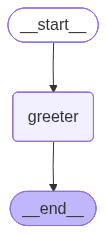

In [35]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

Finally, let's run our state machine and observe the result.

In [ ]:
result = app.invoke({"message": "Bob"})
print(result['message'])

Hey, Bob! How are you?
